# Adaptive Tit-for-Tat Strategy Demo

This notebook demonstrates the behavior of the adaptive GTFT strategy implemented in `src/strategy.py`.

In [14]:
# Add src to path so we can import strategy.py
import sys
import os

src_path = os.path.abspath("src")
if src_path not in sys.path:
    sys.path.append(src_path)

In [15]:
# Import the strategy function
from strategy import strategy

### Define a function to simulate a match

In [16]:
def simulate_match(opponent_strategy, rounds=200):
    my_history = []
    opponent_history = []

    for _ in range(rounds):
        my_move = strategy(my_history, opponent_history)
        opponent_move = opponent_strategy(my_history, opponent_history)

        my_history.append(my_move)
        opponent_history.append(opponent_move)

    return my_history, opponent_history

### Define some basic opponents

In [17]:
def always_cooperate(_, __):
    return 'cooperate'

def always_defect(_, __):
    return 'defect'

def tit_for_tat(_, opponent_history):
    if not opponent_history:
        return 'cooperate'
    return opponent_history[-1]

import random
def random_player(_, __):
    return random.choice(['cooperate', 'defect'])

### Run and plot results

In [18]:
import matplotlib.pyplot as plt

def plot_match(my_history, opponent_history, title, ax=None):
    """
    Plots a single match using a step plot to show moves over rounds.
    
    Args:
        my_history (list): History of your moves.
        opponent_history (list): History of opponent's moves.
        title (str): Title for the subplot.
        ax (matplotlib.axes.Axes, optional): An existing axes to plot on.
    """
    mapping = {'cooperate': 1, 'defect': 0}
    my_moves = [mapping[m] for m in my_history]
    opp_moves = [mapping[m] for m in opponent_history]

    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 3))

    # Plot your moves and opponent's moves
    ax.step(range(1, len(my_moves) + 1), my_moves, where='post', label='My Strategy', linewidth=2)
    ax.step(range(1, len(opp_moves) + 1), opp_moves, where='post', label='Opponent', linestyle='--', linewidth=2)
    
    # Set titles and labels
    ax.set_title(title, fontsize=12)
    ax.set_xlabel('Round', fontsize=10)
    ax.set_ylabel('Move', fontsize=10)
    ax.set_ylim(-0.1, 1.1)
    ax.set_yticks([0, 1])
    ax.set_yticklabels(['Defect', 'Cooperate'])
    ax.legend(loc='upper right')
    ax.grid(True)

def plot_all_matches(match_results):
    """
    Plots the results of matches against multiple opponents in subplots.
    
    Args:
        match_results (dict): A dictionary where keys are opponent names and 
                              values are tuples (my_history, opponent_history).
    """
    n_matches = len(match_results)
    fig, axs = plt.subplots(n_matches, 1, figsize=(12, 3 * n_matches), sharex=True)
    
    # If only one subplot exists, make it iterable
    if n_matches == 1:
        axs = [axs]
        
    for ax, (opponent_name, (my_hist, opp_hist)) in zip(axs, match_results.items()):
        plot_match(my_hist, opp_hist, title=f"Match vs. {opponent_name}", ax=ax)
    
    # Set a common xlabel
    plt.xlabel('Round', fontsize=10)
    plt.tight_layout()
    plt.show()

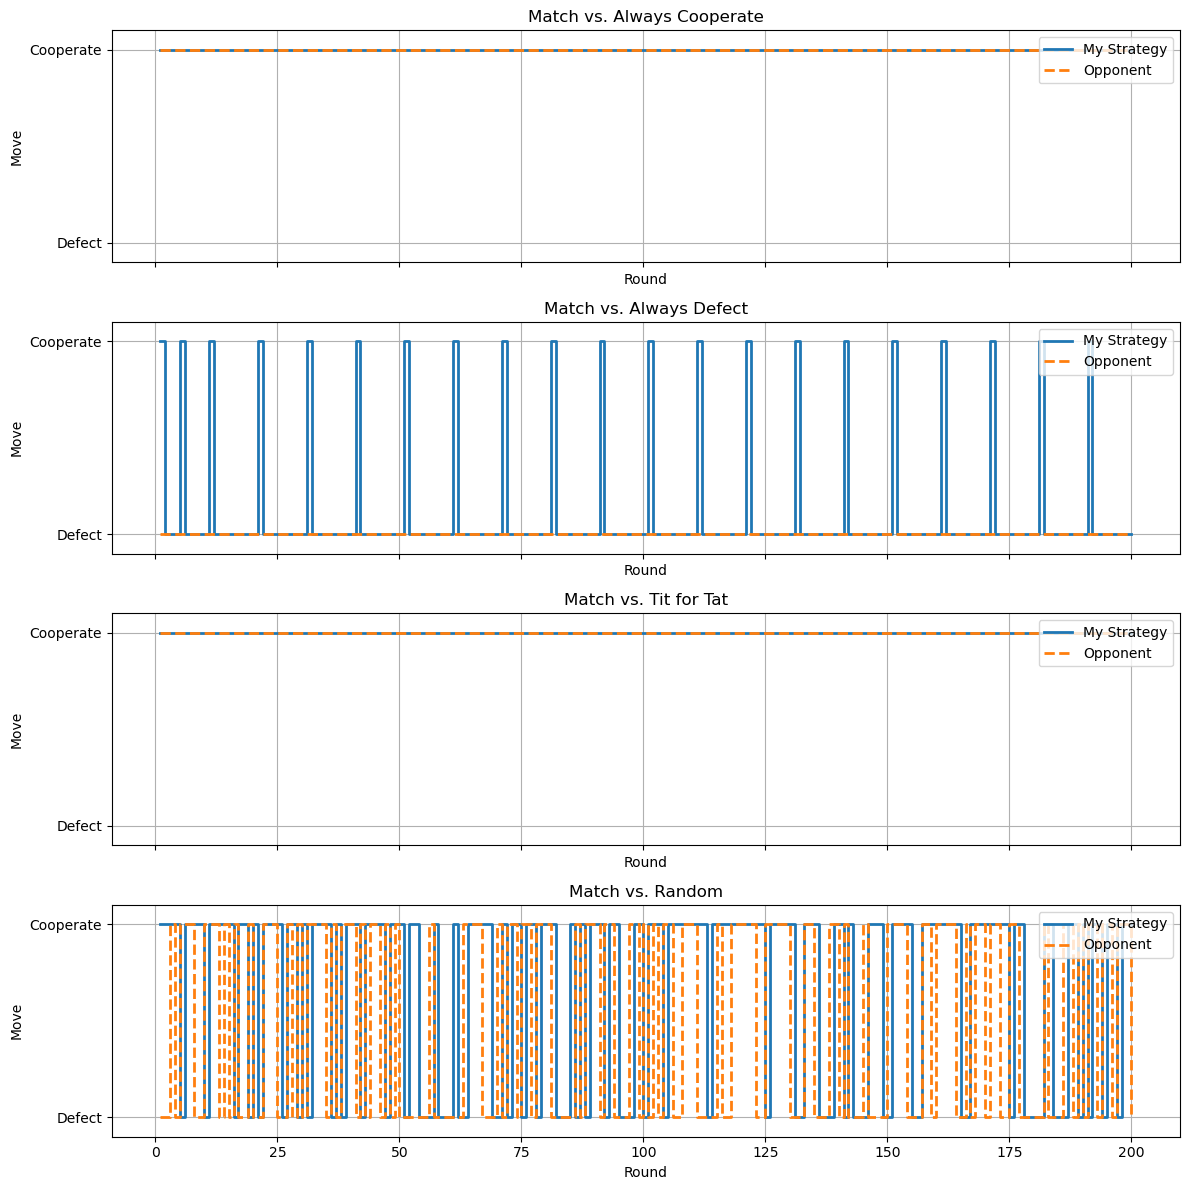

In [19]:
#run simulations to collect match histories for each opponent
opponents = {
    "Always Cooperate": always_cooperate,
    "Always Defect": always_defect,
    "Tit for Tat": tit_for_tat,
    "Random": random_player,
}

# Dictionary to hold the simulation results
match_results = {}
for name, opponent_func in opponents.items():
    my_hist, opp_hist = simulate_match(opponent_func)
    match_results[name] = (my_hist, opp_hist)

# Plot all match results together using subplots
plot_all_matches(match_results)

# Adaptive Generous Tit-for-Tat Strategy for the Prisoner's Dilemma 

* Strategy Explanation:
This strategy is an adaptive variant of Generous Tit-for-Tat (GTFT). It starts by cooperating and then continually adjusts its level of forgiveness based on the opponent's recent and overall behavior. A key feature is the dynamic adjustment of forgiveness: when facing an opponent that frequently cooperates, the strategy becomes more forgiving to build mutual cooperation; conversely, it becomes less forgiving against opponents who frequently defect, thereby avoiding exploitation. Additionally, the strategy incorporates cycle detection to break prolonged defection standoffs and includes periodic tests against always-defect opponents to detect any shift in behavior.

* Rationale and Expected Performance:
By balancing responsiveness with cautious forgiveness, this strategy is designed to perform well across a variety of opponents. Against always-defect strategies, it minimizes losses by mostly defecting while still testing occasionally for any change in tactic. When matched with Tit-for-Tat, it quickly re-establishes cooperation after any deviation, effectively managing cycles of mutual defection. Against random players, the mixed approach allows for stabilization towards cooperation while mitigating potential exploitation. Overall, the adaptive behavior enables the strategy to secure favorable outcomes in diverse competitive scenarios while promoting long-term cooperation where possible.